# Tutorial for seeing the data generated by the adaptive stepsize RungeKutta integration

In [1]:
using ODE
using HDF5
using PyPlot
using KernelDensity   #Needed modules

## Extracting the data

In [2]:
filename = "prueba.hdf5" #The file must exist in the HDF5 folder
file = h5open("../HDF5/$filename", "r")

HDF5 data file: ../HDF5/prueba.hdf5

In [3]:
beta = read(attrs(file)["beta"])
c = read(attrs(file)["c"]);

In [4]:
sim = read(file, "simulation-1")

Dict{ByteString,Any} with 6 entries:
  "S"         => [0.301499,1.04937,1.6899,2.29912,2.93533,3.66978,4.6331,6.0560…
  "initcond"  => [0.9023948028028683,0.10016870508271403,0.3014993934188088]
  "t"         => [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45  …  4999.5,4999.…
  "q"         => [0.902395,0.903385,0.900325,0.894141,0.883628,0.864332,0.81988…
  "invariant" => [-5.64522,-5.64522,-5.64522,-5.64522,-5.64522,-5.64522,-5.6452…
  "p"         => [0.100169,-0.0417547,-0.148942,-0.259213,-0.405336,-0.647143,-…

In [5]:
t = sim["t"]
q = sim["q"]
p = sim["p"]
S = sim["S"];
i = sim["invariant"];

## Extended phase space projections

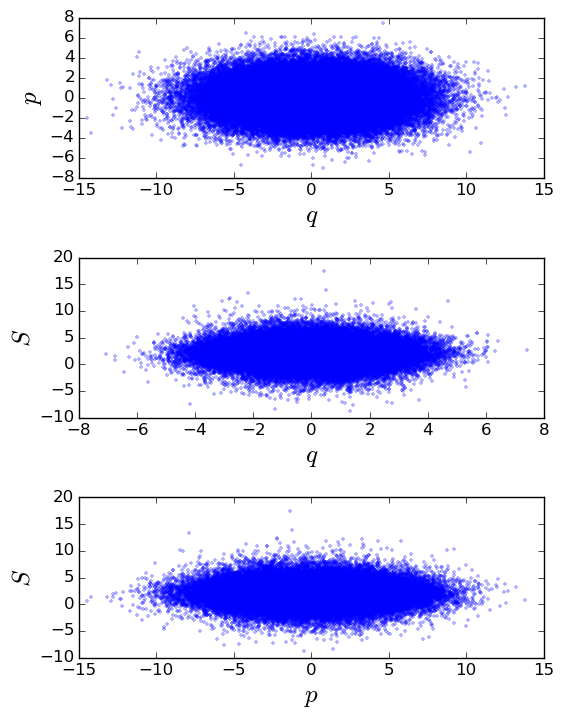

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb829915a10>

In [6]:
fig = plt[:figure](figsize=(6,8))
fig[:subplots_adjust](hspace=.5)


ax = fig[:add_subplot](311)
ax[:set_xlabel](L"$q$",fontsize="18")
ax[:set_ylabel](L"$p$",fontsize="18")
ax[:plot](p,q,".", alpha =0.3, markeredgewidth=0.)

ax = fig[:add_subplot](312)
ax[:set_xlabel](L"$q$",fontsize="18")
ax[:set_ylabel](L"$S$", fontsize="18")
ax[:plot](q,S,".", alpha =0.3, markeredgewidth=0.)


ax = fig[:add_subplot](313)
ax[:set_xlabel](L"$p$",fontsize="18")
ax[:set_ylabel](L"$S$",fontsize="18")
ax[:plot](p,S,".", alpha =0.3, markeredgewidth=0.)

## Histograms

In [7]:
beta = 0.1
c =2.0;

In [8]:
qarray = linspace(-6,6,100)
rhoq = exp(-beta*2*qarray.^2)/sqrt(pi/(2*beta));  #Theoretical marginal distribution of q;

In [9]:
parray = linspace(-10,10,100)
rhop = exp(-beta*parray.^2/2.)/sqrt((2*pi)/(beta));  #Theoretical marginal distribution of p;

In [10]:
E = (p.^2/2 + 2*q.^2)  #Energy;

In [11]:
earray = linspace(0.,80.,100)
rhoe = exp(-beta*earray)/(1/beta); #Theoretical marginal distribution of E;

In [12]:
sarray = linspace(-5.,10.,100)
rhos = exp(sarray-c)./((1.+exp(sarray-c)).^2); #Theoretical marginal distribution of S (logistic);

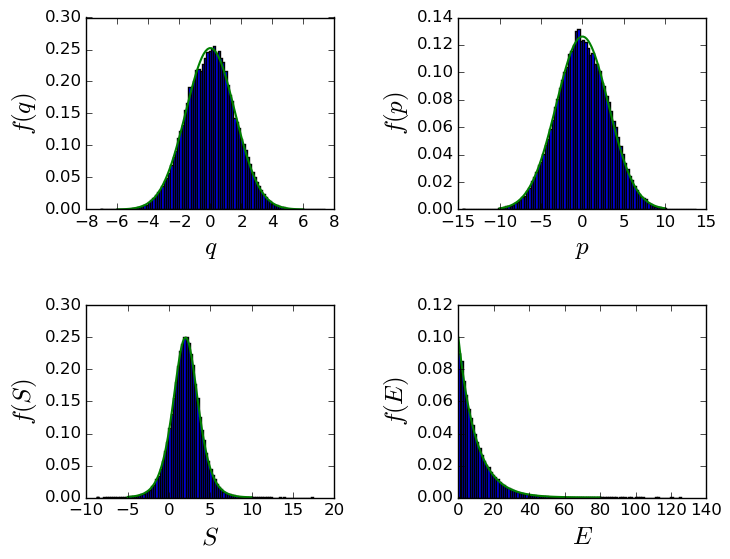

PyObject <matplotlib.text.Text object at 0x7fb828ff7650>

In [13]:
fig = plt[:figure]( )
fig[:subplots_adjust](hspace=.5)
fig[:subplots_adjust](wspace=.5)

ax = fig[:add_subplot](221)
ax[:hist](q,100, normed = 1.)
ax[:plot](qarray,rhoq, linewidth=1.5)
ax[:set_xlabel](L"$q$",fontsize="18")
ax[:set_ylabel](L"$f(q)$",fontsize="18")


ax = fig[:add_subplot](222)
ax[:hist](p,100, normed = 1.)
ax[:plot](parray,rhop, linewidth = 1.5)
ax[:set_xlabel](L"$p$",fontsize="18")
ax[:set_ylabel](L"$f(p)$",fontsize="18")


ax = fig[:add_subplot](223)
ax[:hist](S,100, normed = 1.)
ax[:set_ylim]([0.0,0.30])
ax[:plot](sarray,rhos, linewidth = 1.5)
ax[:set_xlabel](L"$S$",fontsize="18")
ax[:set_ylabel](L"$f(S)$",fontsize="18")

ax = fig[:add_subplot](224)
ax[:hist](E,100, normed = 1.)
ax[:plot](earray,rhoe, linewidth=1.5)
ax[:set_xlabel](L"$E$",fontsize="18")
ax[:set_ylabel](L"$f(E)$",fontsize="18")



## Joint distribution

In [14]:
k= kde((p,q))  #Kernel density estimation;

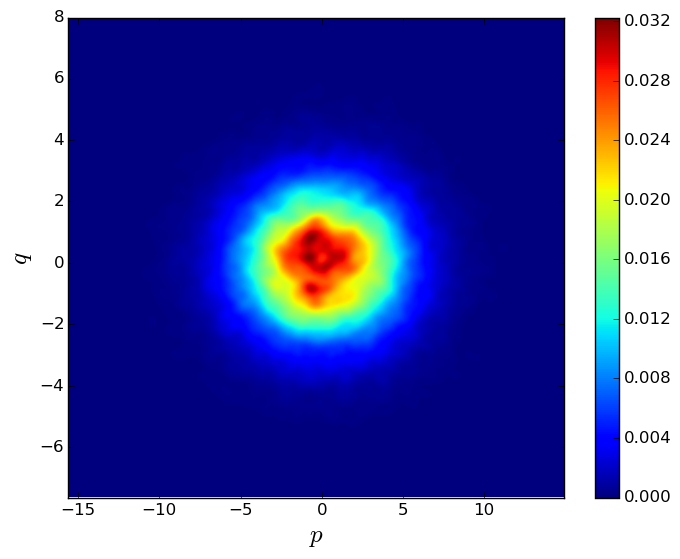

PyObject <matplotlib.text.Text object at 0x7fb829433310>

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [15]:
imshow(k,aspect="auto")
plt[:colorbar]()
plt[:xlabel](L"$p$",fontsize="18")
plt[:ylabel](L"$q$", fontsize = "18")

## Energy average

In [16]:
Eavg = [Float64(sum(E[1:j])/j) for j in 1:(length(E))];

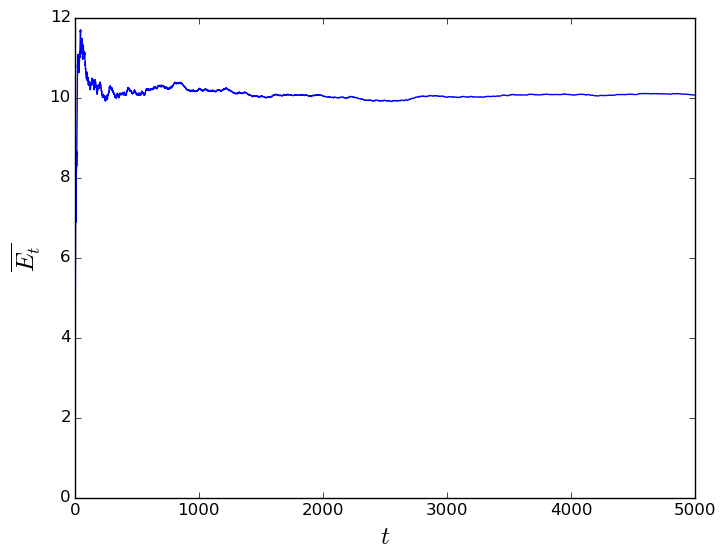

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb82845be50>

In [17]:
plt[:ylabel](L"$\overline{E_t}$",fontsize="18")
plt[:xlabel](L"$t$", fontsize = "18")
plot(t, Eavg)

In [18]:
Eavg[end]

10.061352893767287

 ## Extended invariant

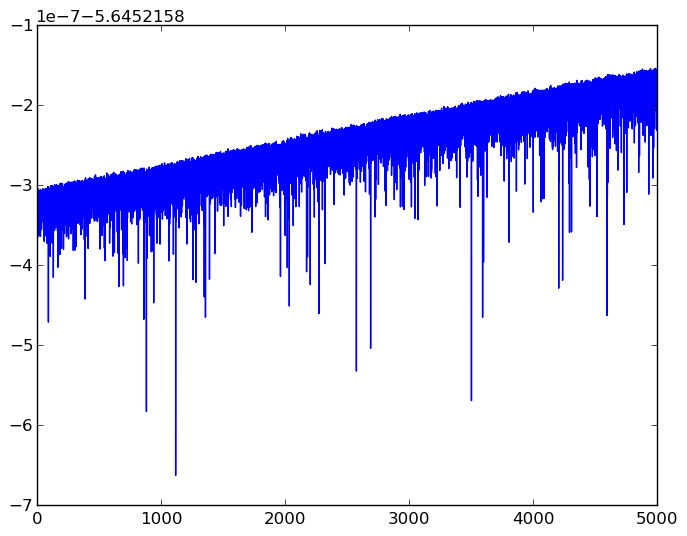

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb828334ed0>

In [21]:
plot(t,i)

In [32]:
maximum(i) - minimum(i)  ##La diferencia está en el orden de 10^-7 como se observa en la gráfica. La diferencia va creciendo con el tiempo

5.089353587450773e-7

In [34]:
i[1]

-5.645216110826731

In [36]:
i[100] - i[1]

-1.616170486329338e-8

In [31]:
i[end - 1000] - i[1]

1.451773812277679e-7